## Loading pregenerated signals

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import seaborn as sns

sns.set_style('whitegrid')

from scipy.io import loadmat

from importlib import reload

import pymultifracs.bivariate
reload(pymultifracs.bivariate)
from pymultifracs.bivariate import bivariate_analysis_full

import numpy as np

import matplotlib.pyplot as plt

from collections import defaultdict

import pyvista as pv

ImportError: cannot import name 'linear_regression' from 'pymultifracs.utils' (/u/74/dumeurm1/unix/PhD/pymultifracs/pymultifracs/utils.py)

In [2]:
names = ['nossnoMF', 'nossMF', 'ssMF', 'ssnoMF']

data = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['data'].transpose() for key in names
}

param = {
    key: loadmat(f'../tests/data/DataSet_{key}.mat')['params'] for key in names
}

param = {
    key: {
        param[key].dtype.names[i]: param[key][0, 0][i] for i in range(len(param[key][0, 0]))
    }
    for key in param
}

In [3]:
def plot_key(key, plot=True):
    
    X = data[key].copy()

    j1 = 3
    j2 = np.log2(X.shape[0]) - 3
    p_exp=2
    gamint = 1

    dwt, lwt = bivariate_analysis_full(X[:, 0], X[:, 1], p_exp=p_exp, j1=j1, j2=j2, gamint=gamint, weighted=True, n_cumul=2,
                                       q1=np.array([0, 1, 2]), q2=np.array([0, 1, 2]))
    
    if not plot:
        return dwt, lwt
    
    print(f'{lwt.cumulants.rho_mf=}')
    
    fig_m, fig_c = lwt.cumulants.plot()
    fig_m.suptitle(key)
    fig_c.suptitle(key)
    lwt.cumulants.plot_legendre(resolution=30)
    plt.suptitle(key)
    plt.show()
    
    plt.plot(dwt.structure.j, dwt.structure.coherence, label='second order (wavelet) coherence')
    plt.plot(lwt.cumulants.j, lwt.cumulants.RHO_MF, label=r'multifractal (leader) coherence')
    plt.xlabel('j')
    plt.title(key)
    plt.legend()
    plt.show()
    
    return dwt, lwt

lwt.cumulants.rho_mf=array([-0.04630067])


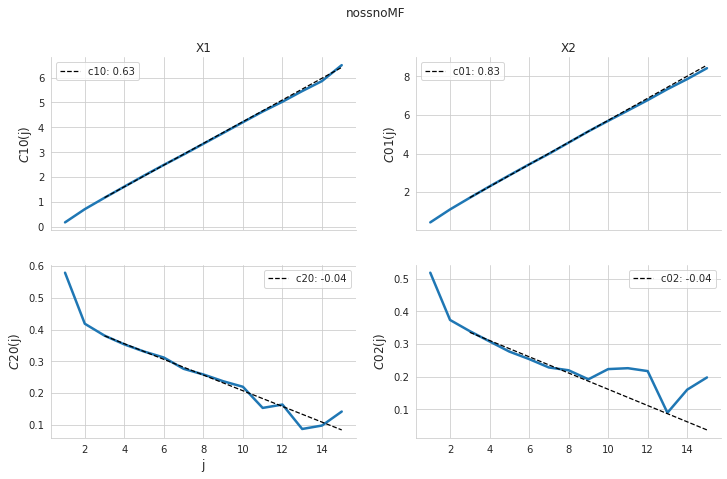

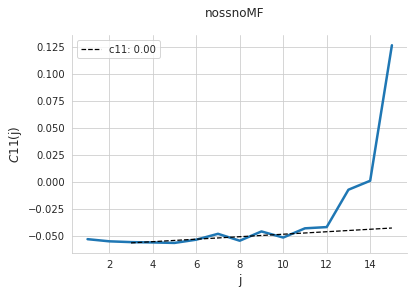

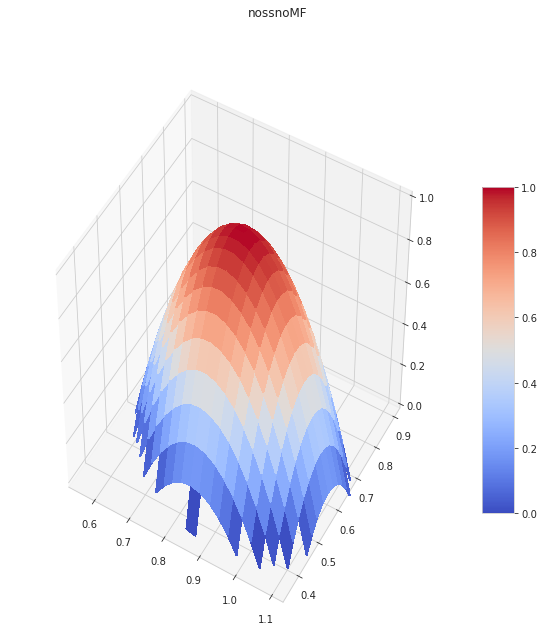

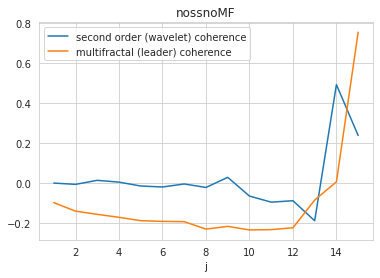

lwt.cumulants.rho_mf=array([0.61084336])


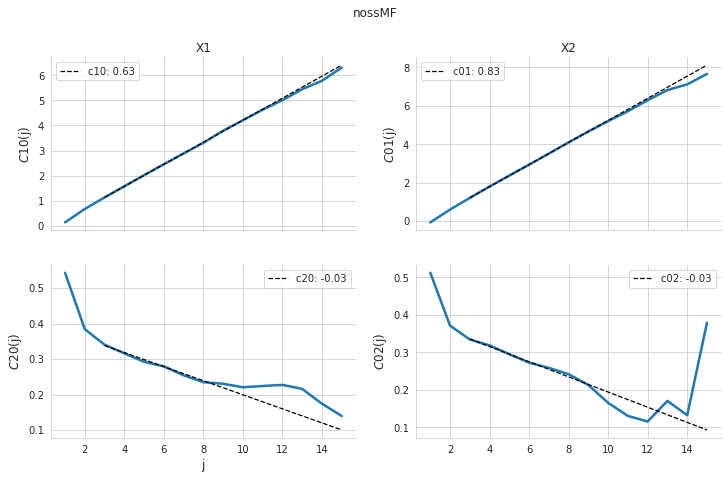

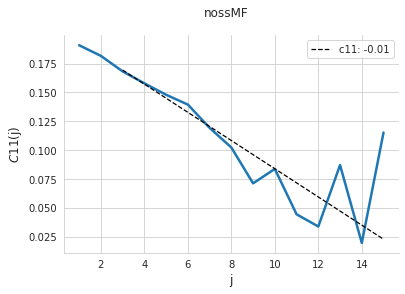

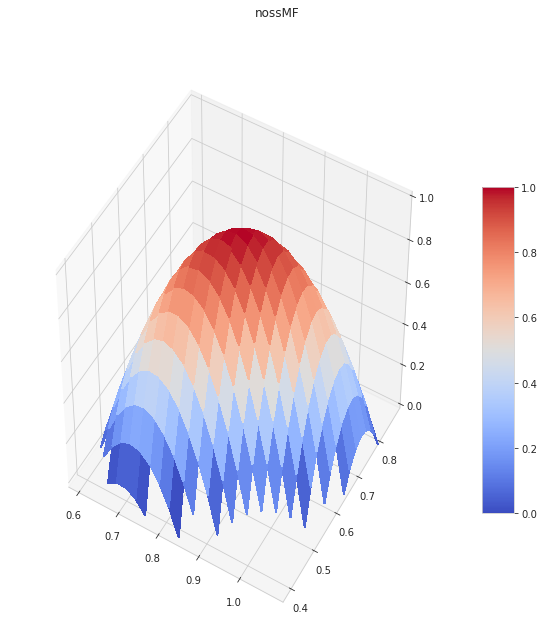

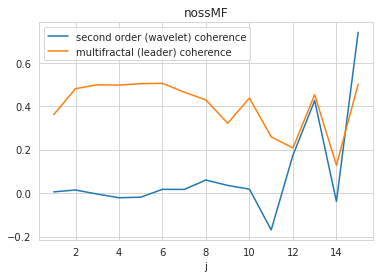

invalid value encountered in sqrt


lwt.cumulants.rho_mf=array([0.70372861])


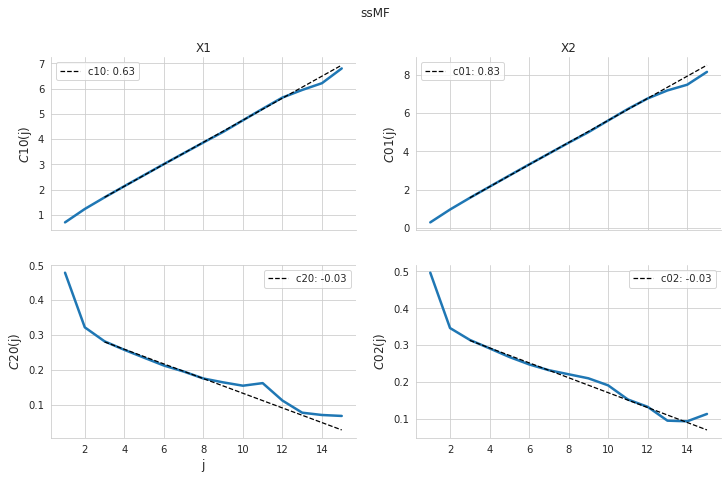

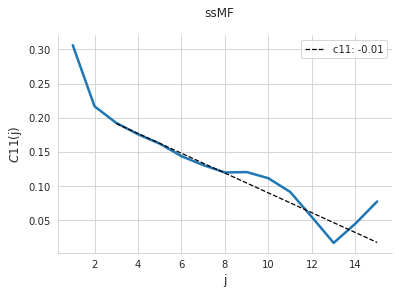

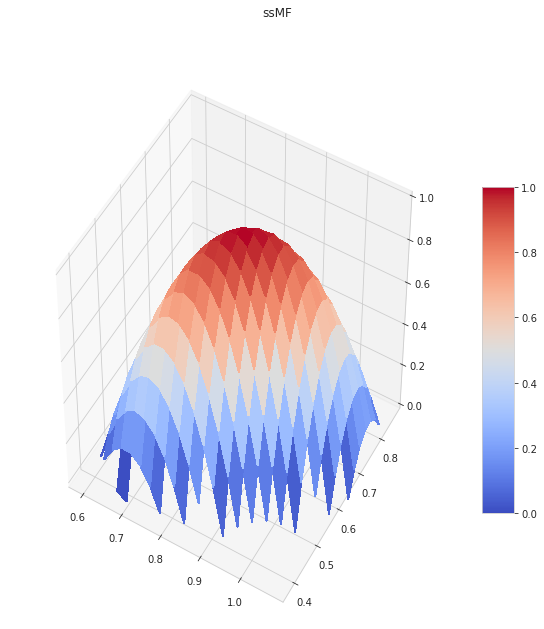

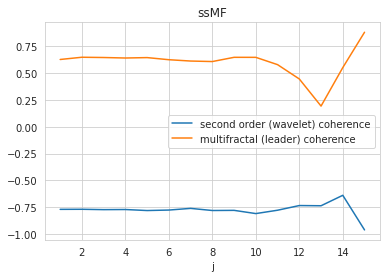

lwt.cumulants.rho_mf=array([0.01734741])


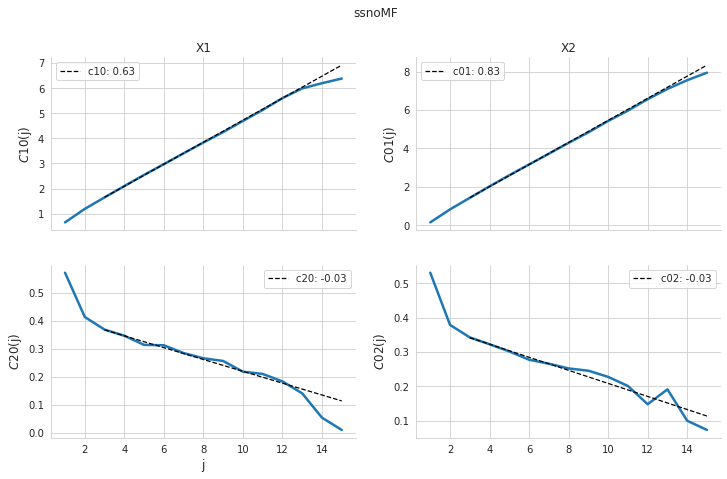

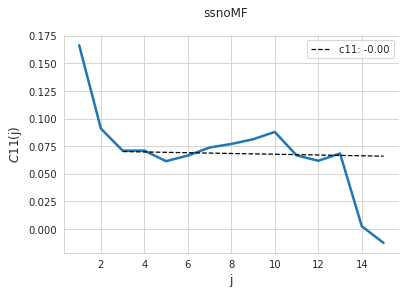

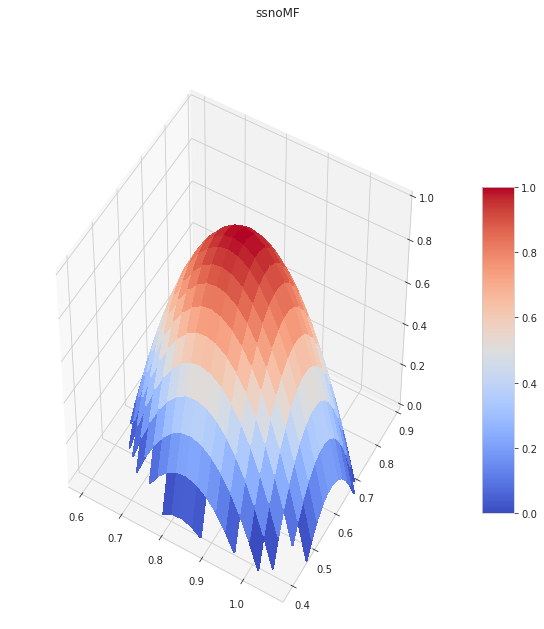

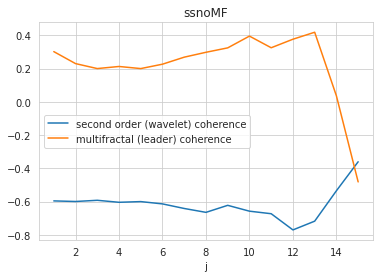

In [8]:
for key in data:
    plot_key(key)